# 線形回帰

## 正規方程式

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.91396451],
       [3.29746815]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.91396451],
       [10.5089008 ]])

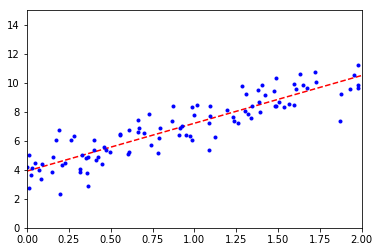

In [4]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.91396451]), array([[3.29746815]]))

In [6]:
lin_predict = lin_reg.predict(X_new)
lin_predict

array([[ 3.91396451],
       [10.5089008 ]])

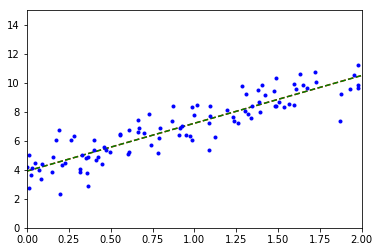

In [7]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X_new, lin_predict, "g--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# 勾配降下法

## バッチ勾配降下法

In [8]:
eta = 0.1
n_iterations = 10000
m = 100

theta = np.random.randn(2, 1)
theta

array([[-1.43794399],
       [-0.22801896]])

In [9]:
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.91396451],
       [3.29746815]])

## 確率的勾配降下法

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
theta

array([[0.98949446],
       [0.04386652]])

In [11]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
#        print("random_index", random_index)
#        print("x_i", xi)
#        print("y_i", yi)
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
#        print("theta", theta)
        
theta

array([[3.89017904],
       [3.2950397 ]])

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print("intercept:", sgd_reg.intercept_)
print("coef:", sgd_reg.coef_)

intercept: [3.92131561]
coef: [3.29512269]


# 多項式回帰

In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
X

array([[-1.80626564],
       [ 1.15704903],
       [ 2.92076461],
       [ 0.92559753],
       [-2.82368082],
       [ 1.51281062],
       [-2.49033308],
       [ 1.61085749],
       [-2.99656903],
       [-1.74832532],
       [-1.95902979],
       [-2.5140813 ],
       [ 1.44122224],
       [ 1.06278752],
       [ 1.48951175],
       [-0.42570319],
       [ 0.50545924],
       [-1.81776412],
       [ 2.17228517],
       [-0.15617984],
       [-2.87209703],
       [-2.94431364],
       [-2.75269207],
       [ 2.39943139],
       [-2.31963571],
       [-1.38511155],
       [-2.05006214],
       [ 2.25917959],
       [ 2.63719333],
       [ 1.80731009],
       [ 0.06688663],
       [-2.26507877],
       [-0.93204245],
       [-1.27344883],
       [-1.24756279],
       [ 2.48591533],
       [ 1.79823996],
       [ 0.76679924],
       [-1.54710304],
       [-0.61090558],
       [ 1.00017839],
       [-1.5828843 ],
       [ 1.16287235],
       [-2.80465864],
       [ 2.79480936],
       [ 2

In [14]:
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
y

array([[ 2.12067087],
       [ 2.6172    ],
       [ 7.16581131],
       [ 2.22424678],
       [ 4.06932673],
       [ 4.75055528],
       [ 1.98461474],
       [ 5.07556859],
       [ 4.74644498],
       [ 1.15132004],
       [ 1.21437961],
       [ 2.10026346],
       [ 5.82652763],
       [ 1.77089277],
       [ 4.88644467],
       [ 1.56811354],
       [ 3.4864119 ],
       [ 2.99525726],
       [ 6.99960822],
       [ 2.59426985],
       [ 4.18871105],
       [ 1.67363126],
       [ 4.73088131],
       [ 8.47928664],
       [ 2.33976673],
       [ 1.17111189],
       [ 2.16542475],
       [ 7.67225204],
       [ 7.9777742 ],
       [ 7.20652375],
       [ 0.46942324],
       [ 1.89415447],
       [ 1.26528079],
       [ 0.98130737],
       [ 0.6868131 ],
       [ 7.13400211],
       [ 6.3416248 ],
       [ 3.86677595],
       [ 1.16926049],
       [ 0.54786718],
       [ 4.6935158 ],
       [ 1.5948913 ],
       [ 3.84787749],
       [ 2.51919564],
       [ 9.15660102],
       [ 7

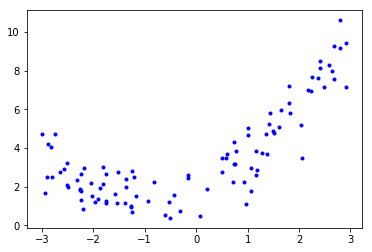

In [15]:
plt.plot(X, y, "b.")
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[-1.80626564e+00,  3.26259558e+00],
       [ 1.15704903e+00,  1.33876247e+00],
       [ 2.92076461e+00,  8.53086588e+00],
       [ 9.25597532e-01,  8.56730790e-01],
       [-2.82368082e+00,  7.97317336e+00],
       [ 1.51281062e+00,  2.28859598e+00],
       [-2.49033308e+00,  6.20175884e+00],
       [ 1.61085749e+00,  2.59486184e+00],
       [-2.99656903e+00,  8.97942598e+00],
       [-1.74832532e+00,  3.05664141e+00],
       [-1.95902979e+00,  3.83779773e+00],
       [-2.51408130e+00,  6.32060479e+00],
       [ 1.44122224e+00,  2.07712155e+00],
       [ 1.06278752e+00,  1.12951730e+00],
       [ 1.48951175e+00,  2.21864525e+00],
       [-4.25703192e-01,  1.81223207e-01],
       [ 5.05459243e-01,  2.55489046e-01],
       [-1.81776412e+00,  3.30426641e+00],
       [ 2.17228517e+00,  4.71882286e+00],
       [-1.56179840e-01,  2.43921424e-02],
       [-2.87209703e+00,  8.24894133e+00],
       [-2.94431364e+00,  8.66898280e+00],
       [-2.75269207e+00,  7.57731364e+00],
       [ 2.

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.94500488]), array([[1.04393638, 0.523496  ]]))

# 学習曲線

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

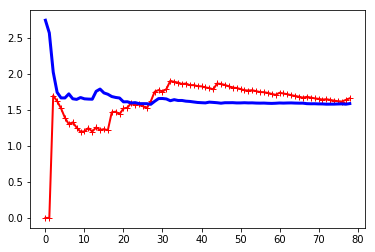

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

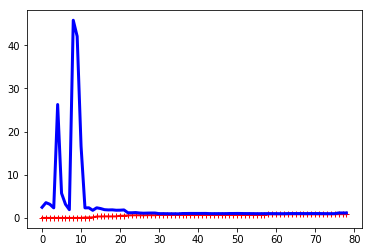

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

# 正則化された線形回帰

## リッジ回帰

In [21]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.14530995]])

In [22]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.14111271])

## Lasso回帰

In [23]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.10169343])

In [24]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.09823488])

## Elastic Net

In [25]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.10345863])

## 早期打ち切り

In [26]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
print(minimum_val_error)
print(best_epoch)
print(best_model)

1.0684070138112414
923
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)


# ロジスティック回帰

In [27]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [28]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

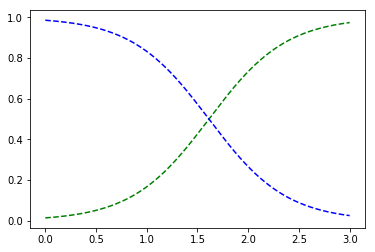

In [30]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g--", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

In [118]:
print(X)
print(y_proba)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]

In [122]:
log_reg.predict([[1.7], [1.5], [2.0]])

array([1, 0, 1])

## ソフトマックス回帰

In [123]:
X = iris["data"][:, (2, 3)]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [124]:
y = iris["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [131]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [132]:
softmax_reg.predict([[5, 2]])

array([2])

In [133]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])